# **Deep Learning Project: Street View Housing Number Digit Recognition**

### **By: Mohit Pammu**


--------------
## **Context** 
--------------

One of the most interesting tasks in deep learning is to recognize objects in natural scenes. The ability to process visual information using machine learning algorithms can be very useful as demonstrated in various applications.

The SVHN dataset contains over 600,000 labeled digits cropped from street-level photos. It is one of the most popular image recognition datasets. It has been used in neural networks created by Google to improve the map quality by automatically transcribing the address numbers from a patch of pixels. The transcribed number with a known street address helps pinpoint the location of the building it represents. 

----------------
## **Objective**
----------------

Our objective is to predict the number depicted inside the image by using Artificial or Fully Connected Feed Forward Neural Networks and Convolutional Neural Networks. We will go through various models of each and finally select the one that is giving us the best performance. 

-------------
## **Dataset**
-------------
Here, we will use a subset of the original data to save some computation time. The dataset is provided as a .h5 file. The basic preprocessing steps have been applied on the dataset.

## **Importing the necessary libraries**

In [93]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization, Conv2D, LeakyReLU, MaxPooling2D, Flatten

from tensorflow.keras.losses import categorical_crossentropy

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.utils import to_categorical

import warnings
warnings.filterwarnings('ignore') # Ignore warnings for cleaner output

**Let us check the version of tensorflow.**

In [94]:
print(tf.__version__)

2.19.0


## **Load the dataset**

- Let us now load the dataset that is available as a .h5 file.
- Split the data into the train and the test dataset.

In [95]:
import h5py

# Open the file as read only

h5f = h5py.File('/Users/mohitpammu/Desktop/MIT-ADSP/Elective Project/Deep Learning/SVHN_single_grey1.h5', 'r')

# Load and split the data into train and test datasets

X_train = h5f['X_train'][:]

y_train = h5f['y_train'][:]

X_test = h5f['X_test'][:]

y_test = h5f['y_test'][:]

# Close the file

h5f.close()


Check the number of images in the training and the testing dataset.

In [96]:
len(X_train), len(X_test)

(42000, 18000)

**Observations:**

* There are 42,000 images in the training set and 18,000 images in the testing set.

## **Visualizing images**

- Use X_train to visualize the first 10 images.
- Use Y_train to print the first 10 labels.

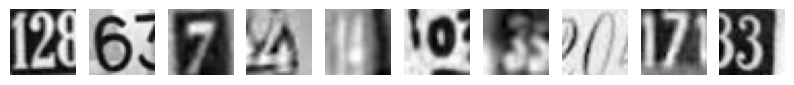

label for each of the above image, respectively: [2 6 7 4 4 0 3 0 7 3]


In [97]:
# Visualizing the first 10 images in the X_train dataset to understand the data
plt.figure(figsize=(10,1))

for i in range(10):

  plt.subplot(1,10,i+1) # Create a subplot with 1 row and 10 columns, and plot the i-th image in the i-th column

  plt.imshow(X_train[i], cmap = "gray") # Display the i-th image in grayscale

  plt.axis('off')

plt.show()

print('label for each of the above image, respectively: %s' % (y_train[0:10]))

**Observations:**

* As we can see, the image quality for the data is not good
* Some images have multiple numbers in them and others are extremely blurry/ pixelated making it hard to decipher which specific number they are even though they have labels 

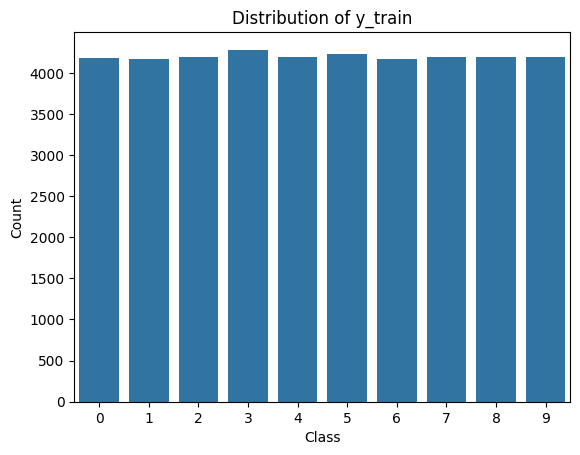

In [98]:
# Plotting the distribution of the labels in the training set
sns.countplot(x= y_train)
plt.title("Distribution of y_train")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

**Observations:**

* Here we can see that each class of numbers is fairly evenly distributed

## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [99]:
print("Shape of first image:", X_train[0].shape)

print('-'*60)

print("Array of pixels:\n", X_train[0])

Shape of first image: (32, 32)
------------------------------------------------------------
Array of pixels:
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


In [100]:
# Reshaping the training and test dataset by flattening them from 2D array into 1D array
X_train = X_train.reshape(X_train.shape[0], 1024)

X_test = X_test.reshape(X_test.shape[0], 1024)

### **Normalize the train and the test data**

In [101]:
# Normalize the inputs to 0-1 by dividing by 255

X_train = X_train.astype('float32')/255.0

X_test = X_test.astype('float32')/255.0

Print the shapes of Training and Test data

In [102]:
print('Training Set:', X_train.shape, y_train.shape)

print('Test Set:', X_test.shape, y_test.shape)

Training Set: (42000, 1024) (42000,)
Test Set: (18000, 1024) (18000,)


### **One-hot encode output**

In [103]:
# One-hot encode the labels
y_train = to_categorical(y_train)

y_test = to_categorical(y_test)

# Check the shape of the one-hot encoded labels
y_test

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]])

**Observations:**
* Each entry of the target variable is a one-hot encoded vector, not a single label 

## **Model Building**

Now that we have done the data preprocessing, let's build an ANN model.

### Fix the seed for random number generators

In [104]:
# Setting the random seed for numpy to ensure reproducibility of results
np.random.seed(24)

import random

random.seed(24)

tf.random.set_seed(24)

### **Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **64 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **32 nodes and the relu activation**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_1 function and store the model in a new variable. 
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train an ANN model as per the above mentioned architecture.**

In [105]:
# Defining the ANN model function
def nn_model_1():

  model = Sequential()

  # Input layer with 64 nodes and ReLU activation, input shape is 1024 (32x32 images flattened)
  model.add(Dense(64, activation = 'relu', input_shape=(1024,))) 

  # Hidden layer with 32 nodes and ReLU activation
  model.add(Dense(32, activation = 'relu'))

  # Output layer with 10 nodes (one for each digit 0-9) and softmax activation for multi-class classification 
  model.add(Dense(10, activation = 'softmax')) 

  # Compile the model
  model.compile(loss= 'categorical_crossentropy', optimizer = Adam(learning_rate = 0.001), metrics = ['accuracy'])

  return model


In [106]:
# Assigning the model function to a variable for further use
model_1 = nn_model_1()

# Printing the model summary to check the layers and parameters
model_1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 68,010 (265.66 KB)

 Trainable params: 68,010 (265.66 KB)

 Non-trainable params: 0 (0.00 B)

In [107]:
# Fitting the model to the training data
history_model_1 = model_1.fit(X_train, y_train, validation_split = 0.2, batch_size = 128, verbose = 1, epochs = 20)

Epoch 1/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1034 - loss: 2.3158 - val_accuracy: 0.1332 - val_loss: 2.2731
Epoch 2/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1547 - loss: 2.2320 - val_accuracy: 0.2156 - val_loss: 2.0881
Epoch 3/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2490 - loss: 2.0493 - val_accuracy: 0.3004 - val_loss: 1.9352
Epoch 4/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3345 - loss: 1.9059 - val_accuracy: 0.4098 - val_loss: 1.7457
Epoch 5/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4291 - loss: 1.6995 - val_accuracy: 0.4705 - val_loss: 1.5775
Epoch 6/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4884 - loss: 1.5504 - val_accuracy: 0.5105 - val_loss: 1.4857
Epoch 7/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5229 - loss: 1.4688 - val_accuracy: 0.5367 - val_loss: 1.4293
Epoch 8/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5400 - loss: 1.4162 - val_accuracy: 0.

### **Plot the Training and Validation Accuracies and write down your Observations.**

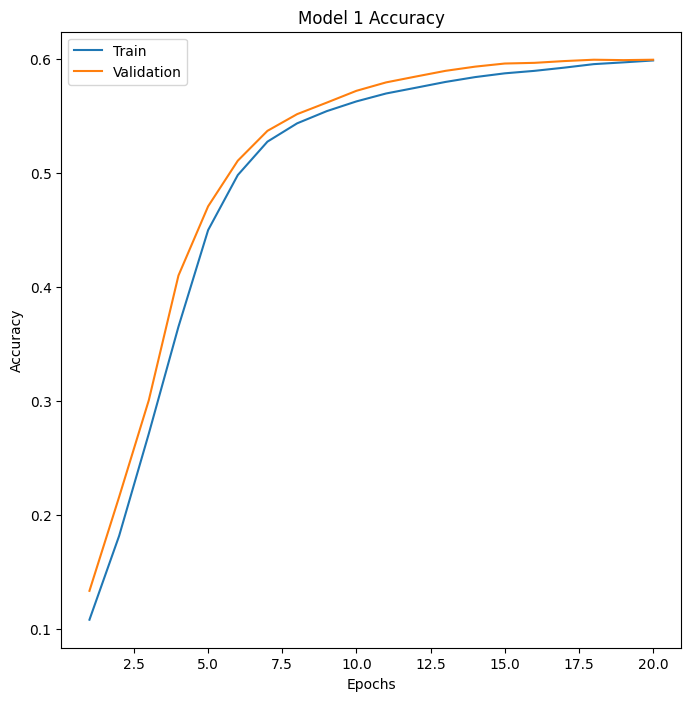

In [108]:
# Extracting the history of the model training for plotting
dict_hist = history_model_1.history

# Creating a list of epochs for plotting
list_ep = [i for i in range(1, 21)]

# Plotting the training and validation accuracy over epochs
plt.figure(figsize = (8,8))
plt.plot(list_ep, dict_hist['accuracy'], label = 'accuracy')
plt.plot(list_ep, dict_hist['val_accuracy'], label = 'val_accuracy')
plt.title('Model 1 Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

**Observations:**

* The model performed poorly on both the training and validation set, both peaking at close to ~60% accuracy
* There is a steep rise in model performance from the initial epoch to about the 7th epoch where it plateaus



Let's build one more model with higher complexity and see if we can improve the performance of the model. 

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [109]:
# Clearing the backend session to free up resources and reset the state of the model
from tensorflow.keras import backend

backend.clear_session()

In [110]:
# Fixing the random seed again for reproducibility after clearing the session
np.random.seed(24)

import random

random.seed(24)

tf.random.set_seed(24)

### **Second Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **256 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **128 nodes and the relu activation**
 - Add the **Dropout layer with the rate equal to 0.2**
 - Third hidden layer with **64 nodes and the relu activation**
 - Fourth hidden layer with **64 nodes and the relu activation**
 - Fifth hidden layer with **32 nodes and the relu activation**
 - Add the **BatchNormalization layer**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 -Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.0005), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_2 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the new ANN model as per the above mentioned architecture**

In [111]:
# Defining a second ANN model with more layers and dropout for regularization
def nn_model_2():

  model = Sequential()

  # First hidden layer with 256 nodes and ReLU activation, input shape is 1024 (32x32 images flattened)
  model.add(Dense(256, activation = 'relu', input_shape=(1024, ))) 

  # Second hidden layer with 128 nodes and ReLU activation
  model.add(Dense(128, activation = 'relu'))

  # Dropout layer with 20% dropout rate to prevent overfitting
  model.add(Dropout(0.2)) 

  # Third hidden layer with 64 nodes and ReLU activation
  model.add(Dense(64, activation = 'relu')) 

  # Fourth hidden layer with 64 nodes and ReLU activation
  model.add(Dense(64, activation = 'relu'))

  # Fifth hidden layer with 32 nodes and ReLU activation
  model.add(Dense(32, activation = 'relu')) 

  # Batch normalization layer to normalize the activations of the previous layer, helps in speeding up training and reducing overfitting
  model.add(BatchNormalization()) 

  # Output layer with 10 nodes (one for each digit 0-9) and softmax activation for multi-class classification
  model.add(Dense(10, activation = 'softmax')) 

  # Compile the model
  # The learning rate is set to 0.0005 to reduce the learning rate and avoid overfitting
  # The batch size is set to 128 to reduce the batch size and avoid overfitting
  model.compile(loss = 'categorical_crossentropy', optimizer = Adam(learning_rate = 0.0005), metrics = ['accuracy'])

  return model

In [112]:
# Assigning the model function to a variable for further use
model_2 = nn_model_2()

# Printing the model summary to check the layers and parameters
model_2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 310,250 (1.18 MB)

 Trainable params: 310,186 (1.18 MB)

 Non-trainable params: 64 (256.00 B)

**Observations:**
* The model has over 240,000 more paramaters than the previous model at 310,186 trainable parameters compared to 68,010
* Note there are 64 non-trainable parameters

In [113]:
# Fitting the second model to the training data
history_model_2 = model_2.fit(X_train, y_train, validation_split = 0.2, batch_size = 128, verbose = 1, epochs = 30)

Epoch 1/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0999 - loss: 2.4244 - val_accuracy: 0.1006 - val_loss: 2.2994
Epoch 2/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1498 - loss: 2.2403 - val_accuracy: 0.3085 - val_loss: 2.0232
Epoch 3/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3909 - loss: 1.7160 - val_accuracy: 0.5063 - val_loss: 1.4974
Epoch 4/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5269 - loss: 1.3965 - val_accuracy: 0.5927 - val_loss: 1.2428
Epoch 5/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5952 - loss: 1.2272 - val_accuracy: 0.6456 - val_loss: 1.1071
Epoch 6/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6256 - loss: 1.1442 - val_accuracy: 0.6748 - val_loss: 1.0235
Epoch 7/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6494 - loss: 1.0888 - val_accuracy: 0.6955 - val_loss: 0.9511
Epoch 8/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6722 - loss: 1.0272 - val_accuracy: 0.

### **Plot the Training and Validation Accuracies and write down your Observations.**

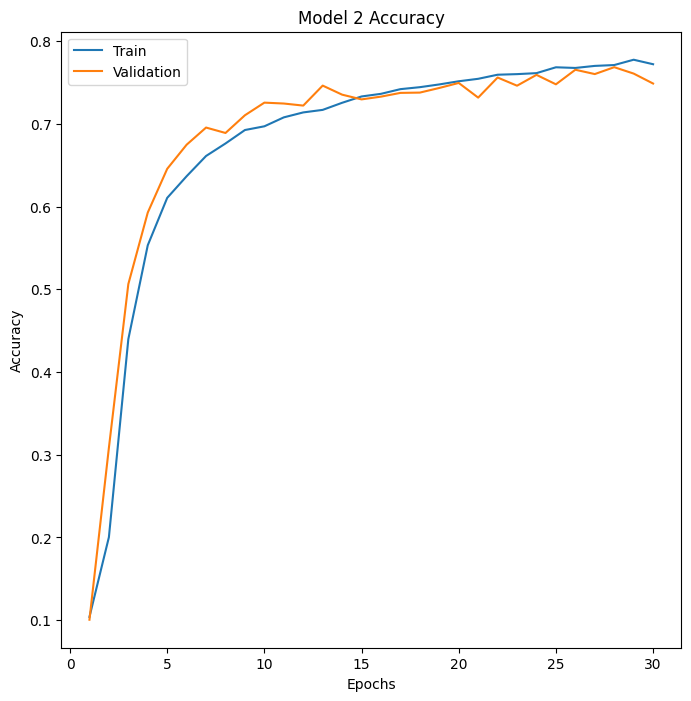

In [114]:
# Extracting the history of the model training for plotting
dict_hist = history_model_2.history

# Creating a list of epochs for plotting
list_ep = [i for i in range(1, 31)]

# Plotting the training and validation accuracy over epochs for the second model
plt.figure(figsize = (8,8))
plt.plot(list_ep, dict_hist['accuracy'], label = 'accuracy')
plt.plot(list_ep, dict_hist['val_accuracy'], label = 'val_accuracy')
plt.title('Model 2 Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

**Observations:**
* We can see from this graph that the perfomance has improved significantly from the previous model, although still not good performance
* The accuracy for both the training and validation sets increased to about ~76%
* Both sets exhibited a steep rise through the initial epoch until about the 10th epoch where they plateaued 

## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

In [115]:
# Predicting the classes for the test set using the second trained model
test_pred = model_2.predict(X_test)

# Converting the predicted probabilities to class labels by taking the index of the maximum probability
test_pred = np.argmax(test_pred, axis = -1)

563/563 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step


**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [116]:
# Converting the one-hot encoded test labels back to class labels for comparison
y_test = np.argmax(y_test, axis = -1)

### **Print the classification report and the confusion matrix for the test predictions. Write your observations on the final results.**

              precision    recall  f1-score   support

           0       0.83      0.78      0.80      1814
           1       0.66      0.85      0.74      1828
           2       0.76      0.78      0.77      1803
           3       0.64      0.75      0.69      1719
           4       0.78      0.82      0.80      1812
           5       0.75      0.71      0.73      1768
           6       0.87      0.71      0.78      1832
           7       0.66      0.86      0.75      1808
           8       0.87      0.61      0.72      1812
           9       0.82      0.64      0.72      1804

    accuracy                           0.75     18000
   macro avg       0.76      0.75      0.75     18000
weighted avg       0.76      0.75      0.75     18000



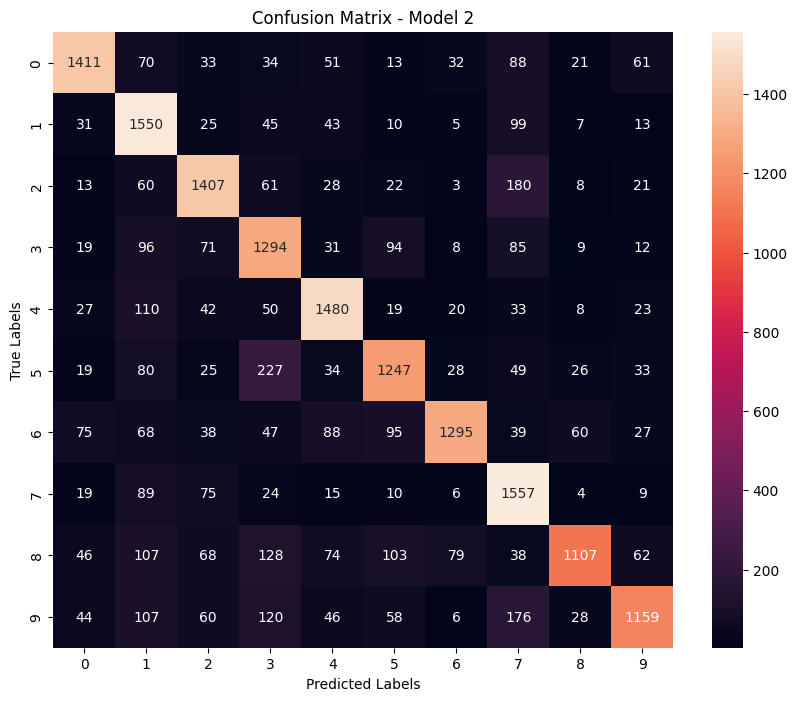

In [117]:
# Importing classification report and confusion matrix from sklearn to evaluate the model's performance
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Printing the classification report to evaluate the model's performance on the test set
print(classification_report(y_test, test_pred))

# Using actual labels and predicted labels to create a confusion matrix
cm = confusion_matrix(y_test, test_pred)

# Plotting the confusion matrix using seaborn's heatmap for better visualization
plt.figure(figsize = (10,8))
sns.heatmap(cm, annot = True, fmt = '.0f') 
plt.title('Confusion Matrix - Model 2')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

**Final Observations:**

* Model 2 performed much better than Model 1 at ~76% compared to ~60%.
* On Model 2, a majority of labels were predicted correctly, however, there are still numerous errors.
* The most errors occur when predicting the label '3', it is being labeled as '5' erroneously 227 times.
* The second most incorrectly predicted label is '7' being predicted as '2' 180 times.
* A close third is again '7' being incorrectly labeled as '9' 176 times, so we can see this model has difficulties with '7'.
* Despite the model having difficulties with '7', the label '7' has the highest number of accurate predictions at 1557.
* '1' has the second highest number of accurate predictions at 1550. 
* The numbers '6' and '8' were predicted the most accurately as they have the most single digit mistakes compared to the other numbers.
* Both precision and recall have fairly high ranges.

## **Using Convolutional Neural Networks**

### **Load the dataset again and split the data into the train and the test dataset.**

In [118]:
# Load the h5 file again to ensure the data is loaded correctly for further use
h5f = h5py.File('/Users/mohitpammu/Desktop/MIT-ADSP/Elective Project/Deep Learning/SVHN_single_grey1.h5', 'r')

# Split the data into train and test datasets again to ensure consistency
X_train = h5f['X_train'][:]

y_train = h5f['y_train'][:]

X_test = h5f['X_test'][:]

y_test = h5f['y_test'][:]

h5f.close()

Check the number of images in the training and the testing dataset.

In [119]:
len(X_train), len(X_test)

(42000, 18000)

**Observation:**
* Since we used the same data and performed the identical initial split, there are still 42,000 images in the training dataset and 18,000 in the testing dataset.

## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Reshape the train and the test dataset because we always have to give a 4D array as input to CNNs.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [120]:
print('Shape of the first image:', X_train[0].shape)

print('-'*60)

print('Array of pixels:\n', X_train[0])

Shape of the first image: (32, 32)
------------------------------------------------------------
Array of pixels:
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


Reshape the dataset to be able to pass them to CNNs. Remember that we always have to give a 4D array as input to CNNs

In [121]:
# Reshaping the training and test dataset into 4D arrays for CNN input (samples, height, width, channels)
X_train = X_train.reshape(X_train.shape[0], 32, 32, 1)

X_test = X_test.reshape(X_test.shape[0], 32, 32, 1)

Normalize inputs from 0-255 to 0-1

In [122]:
# Normalize the inputs to 0-1 by dividing by 255
# Converting the pixel values to float32 for better precision and normalizing to the range [0, 1]
X_train = X_train.astype('float32')/255.0

X_test = X_test.astype('float32')/255.0

Print New shape of Training and Test

In [123]:
print('Training Set:', X_train.shape, y_train.shape)

print('Test Set:', X_test.shape, y_test.shape)

Training Set: (42000, 32, 32, 1) (42000,)
Test Set: (18000, 32, 32, 1) (18000,)


### **One-hot encode the labels in the target variable y_train and y_test.**

In [124]:
# One-hot encode the labels for the CNN model
y_train = to_categorical(y_train)

y_test = to_categorical(y_test)

# Check the shape of the one-hot encoded labels for the test set
y_test

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]])

**Observation:**

* Each entry is a one-hot encoded vector and not a single label


## **Model Building**

Now that we have done data preprocessing, let's build a CNN model.
Fix the seed for random number generators

In [125]:
# Setting the random seed for numpy to ensure reproducibility of results
np.random.seed(24)

import random

random.seed(24)

tf.random.set_seed(24)

### **Model Architecture**
- **Write a function** that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Another **LeakyRelu** with the **slope equal to 0.1**
 - A **max-pooling layer** with a **pool size of 2x2**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_1 and store the output in a new variable.
- Print the summary of the model.
- Fit the model on the training data with a **validation split of 0.2, batch size = 32, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train a CNN model as per the above mentioned architecture.**

In [ ]:
# Defining the first Convolutional Neural Network (CNN) model
def cnn_model_1():
  
  model = Sequential()

  # First convolutional layer with 16 filters, kernel size of 3x3, and 'same' padding to keep the output size same as input size. 
  # Input shape is (32, 32, 1) for grayscale images.
  model.add(Conv2D(16, (3,3), padding = 'same', input_shape=(32, 32, 1))) 

  # Applying LeakyReLU activation function with a negative slope of 0.1 to introduce non-linearity in the model. 
  # This helps in preventing dead neurons in the network.
  model.add(LeakyReLU(negative_slope =  0.1)) 

  # Second convolutional layer with 32 filters, kernel size of 3x3, and 'same' padding to maintain the spatial dimensions of the output.
  model.add(Conv2D(32, (3,3), padding = 'same')) 

  # Applying LeakyReLU activation function again to introduce non-linearity.
  model.add(LeakyReLU(negative_slope = 0.1)) 

  # MaxPooling layer with a pool size of 2x2 to reduce the spatial dimensions of the feature maps. 
  # This helps in reducing the number of parameters and computation in the network and makes the model more robust to noise.
  model.add(MaxPooling2D(pool_size = (2,2)))

  # Flattening the output from the convolutional layers to convert the 2D feature maps into a 1D vector. 
  # This is necessary before passing the data to the fully connected (dense) layers.
  model.add(Flatten()) 

  # Fully connected (dense) layer with 32 nodes. 
  model.add(Dense(32)) 

  # Applying LeakyReLU activation function to the dense layer to introduce non-linearity. 
  # This helps in learning complex patterns in the data.
  model.add(LeakyReLU(negative_slope = 0.1)) 

  # Output layer with 10 nodes (one for each digit 0-9) and softmax activation for multi-class classification. 
  # The softmax activation function will output probabilities for each class, which will sum to 1.
  model.add(Dense(10, activation = 'softmax')) 

  # Compile the model
  # Using categorical_crossentropy as the loss function since this is a multi-class classification problem.
  model.compile(loss = 'categorical_crossentropy', optimizer = Adam(learning_rate = 0.001), metrics = ['accuracy'])

  return model

In [127]:
# Assigning the CNN model function to a variable for further use
cnn_model_1 = cnn_model_1()

# Printing the model summary which will provide a detailed overview of the layers, output shapes, and number of parameters in the model.
cnn_model_1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 32, 32, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │       262,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 267,306 (1.02 MB)

 Trainable params: 267,306 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [82]:
# Fitting the CNN model to the training data
history_cnn_model_1 = cnn_model_1.fit(X_train, y_train, validation_split = 0.2, batch_size = 32, verbose = 1, epochs = 20)

Epoch 1/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.5043 - loss: 1.4562 - val_accuracy: 0.8200 - val_loss: 0.6394
Epoch 2/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8277 - loss: 0.5879 - val_accuracy: 0.8417 - val_loss: 0.5517
Epoch 3/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8584 - loss: 0.4846 - val_accuracy: 0.8470 - val_loss: 0.5245
Epoch 4/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8775 - loss: 0.4169 - val_accuracy: 0.8529 - val_loss: 0.5062
Epoch 5/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8929 - loss: 0.3682 - val_accuracy: 0.8638 - val_loss: 0.4882
Epoch 6/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9031 - loss: 0.3238 - val_accuracy: 0.8613 - val_loss: 0.4959
Epoch 7/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9176 - loss: 0.2867 - val_accuracy: 0.8620 - val_loss: 0.5092
Epoch 8/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9252 - loss: 0.2577 - 

### **Plot the Training and Validation Accuracies and Write your observations.**

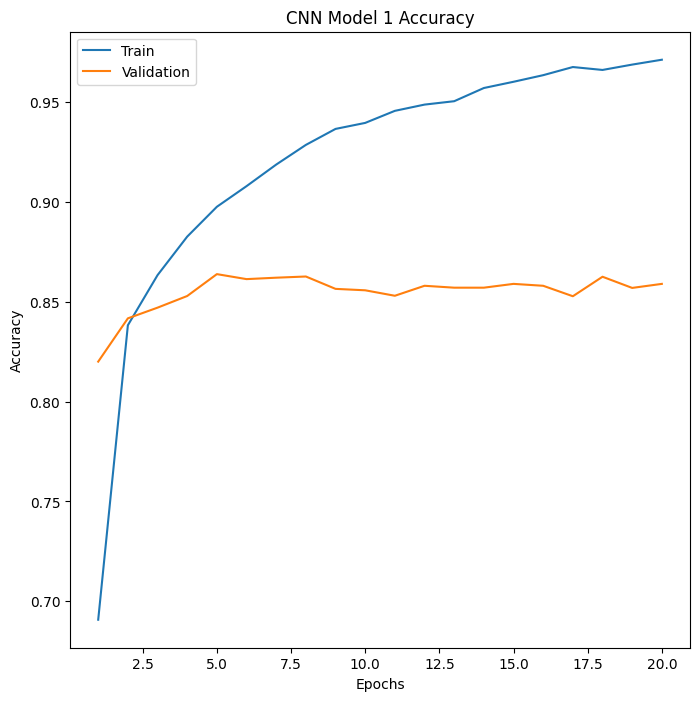

In [83]:
# Extracting the history of the model training for plotting
dict_hist = history_cnn_model_1.history

# Creating a list of epochs for plotting
list_ep = [i for i in range(1, 21)]

# Plotting the training and validation accuracy over epochs for the first CNN model
plt.figure(figsize = (8, 8))
plt.plot(list_ep, dict_hist['accuracy'], label = 'accuracy')
plt.plot(list_ep, dict_hist['val_accuracy'], label = 'val_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('CNN Model 1 Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

**Observations:**

* We can see from the graph that the CNN model has performed too well on the training data and therefore has overfit since it performed poorly on the testing dataset, comparatively.
* The CNN model however performed better than both the ANN models, achieving about ~85% accuracy on the testing dataset.
* It also achieved higher accuracy sooner at about the 5th epoch where it plateaued.
* CNN model 1 also took 3 minutes 5 seconds to fit.


Let's build another model and see if we can get a better model with generalized performance.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [84]:
# Clearing the backend session to free up resources and reset the state of the model
from tensorflow.keras import backend

backend.clear_session()

In [85]:
# Fixing the random seed again for reproducibility after clearing the session
np.random.seed(24)

import random

random.seed(24)

tf.random.set_seed(24)

### **Second Model Architecture**

- Write a function that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add **LeakyRelu** with the **slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - Third Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Fourth Convolutional layer **64 filters and the kernel size of 3x3 with 'same' padding** 
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **dropout layer with the rate equal to 0.5**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **categorical_crossentropy loss, adam optimizers (learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_2 and store the model in a new variable.
- Print the summary of the model.
- Fit the model on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the second CNN model as per the above mentioned architecture.**

In [ ]:
# Defining a second Convolutional Neural Network (CNN) model with more layers and batch normalization for better performance
def cnn_model_2():

  model = Sequential()

  # First convolutional layer with 16 filters, kernel size of 3x3, and 'same' padding to keep the output size same as input size.
  model.add(Conv2D(16, (3,3), padding = 'same', input_shape=(32, 32, 1))) 

  # Adding a LeakyReLU layer with a negative slope of 0.1 to introduce non-linearity. 
  # This activation function helps in preventing dead neurons in the network.
  model.add(LeakyReLU(negative_slope = 0.1)) 

  # Second convolutional layer with 32 filters, kernel size of 3x3, and 'same' padding to maintain the spatial dimensions of the output. 
  # This layer will learn more complex features from the input images.
  model.add(Conv2D(32, (3,3), padding = 'same')) 

  # Adding another LeakyReLU activation function to introduce non-linearity after the second convolutional layer.
  model.add(LeakyReLU(negative_slope = 0.1)) 

  # MaxPooling layer with a pool size of 2x2 to reduce the spatial dimensions of the feature maps. 
  # This helps in reducing the number of parameters and computation in the network and makes the model more robust to noise.
  model.add(MaxPooling2D(pool_size = (2, 2))) 

  # Adding a BatchNormalization layer after max pooling to normalize the activations of the previous layer. 
  # This helps in speeding up training and reducing overfitting by stabilizing the learning process.
  model.add(BatchNormalization()) 

  # Third convolutional layer with 32 filters, kernel size of 3x3, and 'same' padding. 
  # This layer will learn more complex features from the input images after batch normalization.
  model.add(Conv2D(32, (3,3), padding = 'same')) 

  # Adding a LeakyReLU activation function after the third convolutional layer to introduce non-linearity. 
  # This helps in learning complex patterns in the data.
  model.add(LeakyReLU(negative_slope = 0.1)) 

  # Fourth convolutional layer with 64 filters, kernel size of 3x3, and 'same' padding.
  model.add(Conv2D(64, (3,3), padding = 'same'))

  # Adding a LeakyReLU activation function after the fourth convolutional layer to introduce non-linearity. 
  model.add(LeakyReLU(negative_slope = 0.1)) 

  # MaxPooling layer with a pool size of 2x2 to further reduce the spatial dimensions of the feature maps. 
  # This helps in reducing the number of parameters and computation in the network and makes the model more robust to noise.
  model.add(MaxPooling2D(pool_size = (2, 2))) 

  # Adding another BatchNormalization layer after the second max pooling to normalize the activations of the previous layer. 
  # This helps in speeding up training and reducing overfitting by stabilizing the learning process.
  model.add(BatchNormalization()) 

  # Flattening the output from the convolutional layers to convert the 2D feature maps into a 1D vector. 
  # This is necessary before passing the data to the fully connected (dense) layers.
  model.add(Flatten()) 

  # Fully connected (dense) layer with 32 nodes and will learn high-level representations of the input data based.
  model.add(Dense(32)) 

  # Applying LeakyReLU activation function to the dense layer to introduce non-linearity.
  model.add(LeakyReLU(negative_slope = 0.1)) 

  # Adding a Dropout layer with a rate of 0.5 to prevent overfitting.
  # This randomly sets a fraction of the input units to 0 at each update during training time to help prevent overfitting.
  model.add(Dropout(0.5)) 

  # Output layer with 10 nodes (one for each digit 0-9) and softmax activation for multi-class classification. 
  # The softmax activation function will output probabilities for each class, which will sum to 1.
  model.add(Dense(10, activation = 'softmax')) 

  # Compile the model
  # Using categorical_crossentropy as the loss function since this is a multi-class classification problem.
  # The optimizer is set to Adam with a learning rate of 0.001, the metrics are set to ['accuracy'].
  model.compile(loss ='categorical_crossentropy', optimizer = Adam(learning_rate = 0.001), metrics = ['accuracy'])

  return model

In [87]:
# Assigning the CNN model function to a variable for further use
cnn_model_2 = cnn_model_2()

# Printing the model summary which will provide a detailed overview of the layers, output shapes, and number of parameters in the model.
cnn_model_2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 32, 32, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 16, 16, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 8, 8, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │       131,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 164,362 (642.04 KB)

 Trainable params: 164,170 (641.29 KB)

 Non-trainable params: 192 (768.00 B)

**Observations:**
* Note CNN model 2 has 164,170 trainable parameters. That is 103,136 less trainable parameters than CNN model 1 which had 267,306.
* There are also only 192 non-trainable paramaters where CNN model 1 had 0 non-trainable parameters.

In [88]:
# Fitting the second CNN model to the training data
history_cnn_model_2 = cnn_model_2.fit(X_train, y_train, validation_split = 0.2, batch_size = 128, verbose = 1, epochs = 30)

Epoch 1/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 14s 52ms/step - accuracy: 0.3136 - loss: 1.9737 - val_accuracy: 0.1032 - val_loss: 2.9916
Epoch 2/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 14s 52ms/step - accuracy: 0.7764 - loss: 0.7298 - val_accuracy: 0.8496 - val_loss: 0.5335
Epoch 3/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 14s 53ms/step - accuracy: 0.8220 - loss: 0.5886 - val_accuracy: 0.8574 - val_loss: 0.4828
Epoch 4/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 14s 52ms/step - accuracy: 0.8484 - loss: 0.4960 - val_accuracy: 0.8861 - val_loss: 0.3970
Epoch 5/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 14s 52ms/step - accuracy: 0.8589 - loss: 0.4572 - val_accuracy: 0.8940 - val_loss: 0.3698
Epoch 6/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 14s 53ms/step - accuracy: 0.8730 - loss: 0.4154 - val_accuracy: 0.8958 - val_loss: 0.3762
Epoch 7/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 14s 53ms/step - accuracy: 0.8848 - loss: 0.3846 - val_accuracy: 0.8942 - val_loss: 0.3764
Epoch 8/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 14s 54ms/step - accuracy: 0.8887 - loss: 0.3608 - 

### **Plot the Training and Validation accuracies and write your observations.**

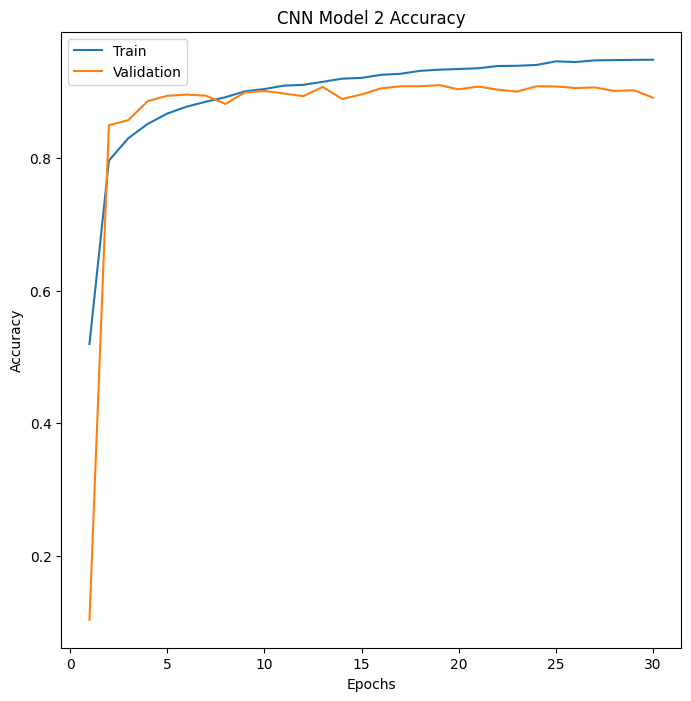

In [89]:
# Extracting the history of the model training for plotting
dict_hist = history_cnn_model_2.history

# Creating a list of epochs for plotting
list_ep = [i for i in range(1, 31)]

# Plotting the training and validation accuracy over epochs for the second CNN model
plt.figure(figsize = (8, 8))
plt.plot(list_ep, dict_hist['accuracy'], label = 'accuracy')
plt.plot(list_ep, dict_hist['val_accuracy'], label = 'val_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('CNN Model 2 Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

**Observations:**

* CNN model 2 achieved about ~90% accuracy on the testing dataset.
* Even though model 2 had less trainable parameters, fitting the model had a runtime of ~7 minutes 3 seconds which took more than double the time of CNN model 1.
* CNN model 2 achieved high accuracy after about the 2nd epoch and plateaued from there.
* Still performed slightly better on the training dataset at about ~94% accuracy so this model did not overfit as much as CNN model 1.

## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

### **Make predictions on the test data using the second model.** 

In [90]:
# Predicting the classes for the test set using the second trained CNN model
test_pred = cnn_model_2.predict(X_test)

# Converting the predicted probabilities to class labels by taking the index of the maximum probability
test_pred = np.argmax(test_pred, axis = -1)

563/563 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step


**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector, but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [91]:
# Converting the one-hot encoded test labels back to class labels for comparison
y_test = np.argmax(y_test, axis = -1)

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      1814
           1       0.93      0.86      0.89      1828
           2       0.89      0.91      0.90      1803
           3       0.91      0.84      0.87      1719
           4       0.88      0.93      0.91      1812
           5       0.90      0.88      0.89      1768
           6       0.88      0.88      0.88      1832
           7       0.92      0.89      0.90      1808
           8       0.90      0.85      0.88      1812
           9       0.84      0.91      0.88      1804

    accuracy                           0.89     18000
   macro avg       0.89      0.89      0.89     18000
weighted avg       0.89      0.89      0.89     18000



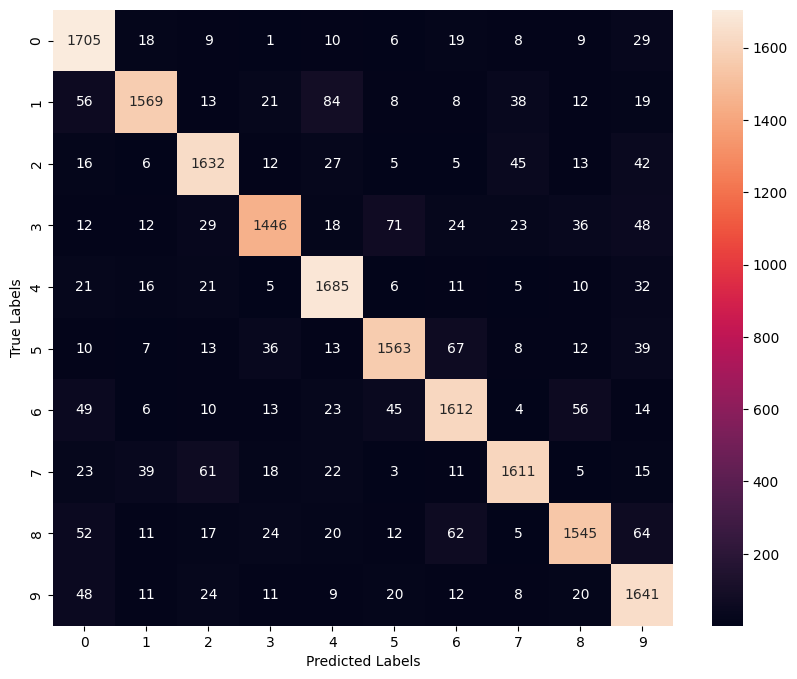

In [92]:
# Printing the classification report using the predicted labels and the true labels to evaluate the model's performance on the test set
print(classification_report(y_test, test_pred))

# Creating a confusion matrix with the actual labels and predicted labels to visualize the performance of the model
cm = confusion_matrix(y_test, test_pred)

# Plotting the confusion matrix using seaborn's heatmap for better visualization
plt.figure(figsize = (10,8))
sns.heatmap(cm, annot = True, fmt = '.0f')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### **Write your final observations on the performance of the model on the test data.**

**Final Observations:**

* CNN model 2 had the best performance metrics of all the models evaluated with an F-1 Accuracy score of 89% so a majority of images were predicted correctly in the testing dataset.
* The most significant mistake CNN model 2 makes is predicting '4' when the true label is '1' at 84 times.
* The second most significant mistake CNN model 2 makes is predicting '5' when the true label is '3' at 71 times.
* Note there are no mistake counts over 100 for any of the class labels.
* '0' was correctly predicted the most 1705 times, '4' the second most 1685 times, and '9' third 1641 times.
* Compared to the other models, CNN model 2 had a higher total accurate predictions count which is consistent with the performance evaluation.
* ANN model 2 had no accurate prediction counts totaling 1600 accross all class labels, where CNN model 2 had 6 class labels with accurate label counts totaling at least 1600. 
* Precision, Recall, and F1-score did not have a high range between all the classes meaning it was fairly accurate among all classes.
* The major drawback with CNN model 2 is of course the longer runtime despite having fewer trainable parameters (also more epochs). 
* CNN model 1 had a faster runtime but it had significantly lower accuracy so there is a tradeoff between CNN model 1 and CNN model 2 (both performed better than the ANN models so we will rule those out).
* If the goal is for speedy results with decent accuracy then CNN model 1 is suitable, however, if the goal is to get the most accurate results, then CNN model 2 is the suitable choice.